In [5]:
import pandas as pd

In [7]:
# load the dataset
df=pd.read_csv(r"C:\Users\buset\Downloads\dataset3 - Sheet1.csv")

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"Allen, Mr. William",male,35,0,0,373450,8.05,NaN,S
1,2,0,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113781,26.55,C103,C
2,3,1,3,"Saundercock, Mr. William H.",male,20,0,0,A/5. 2151,7.25,NaN,S
3,4,1,1,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.28,NaN,S
4,5,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.75,NaN,S
5,6,0,3,"Hewlett, Mrs. (Mary D Kingcome)",female,55,0,0,248706,16.00,NaN,S
6,7,1,2,"Rice, Master. Eugene",male,2,4,1,382652,29.12,NaN,Q
7,8,0,2,"Williams, Mr. Charles Eugene",male,30,0,0,244373,13.00,NaN,S
8,9,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,36,1,0,113803,53.10,C123,C
9,10,0,3,"McCarthy, Mr. Timothy J.",male,54,0,0,17463,51.86,E46,S


In [11]:
# display the first rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"Allen, Mr. William",male,35,0,0,373450,8.05,NaN,S
1,2,0,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113781,26.55,C103,C
2,3,1,3,"Saundercock, Mr. William H.",male,20,0,0,A/5. 2151,7.25,NaN,S
3,4,1,1,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.28,NaN,S
4,5,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.75,NaN,S


In [13]:
# check for the null values
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,False,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,True,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
# Check for null values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          7
Embarked       0
dtype: int64

In [17]:
# Drop rows with missing values (or you can fill them)
df_clean = df.dropna()

In [19]:
df_clean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,0,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113781,26.55,C103,C
8,9,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,36,1,0,113803,53.10,C123,C
9,10,0,3,"McCarthy, Mr. Timothy J.",male,54,0,0,17463,51.86,E46,S


In [21]:
#check  for datatypes
print(df_clean.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [25]:
# Check for unique values
print(df_clean['Survived'].unique())

[0 1]


In [27]:
print(df_clean['Pclass'].unique())

[1 3]


In [29]:
survival_by_gender = df_clean.groupby('Sex')['Survived'].mean()
print("Survival rate by gender:\n", survival_by_gender)

Survival rate by gender:
 Sex
female    0.5
male      0.0
Name: Survived, dtype: float64


In [31]:
survival_by_class = df_clean.groupby('Pclass')['Survived'].mean()
print("Survival rate by class:\n", survival_by_class)

Survival rate by class:
 Pclass
1    0.5
3    0.0
Name: Survived, dtype: float64


In [33]:
survival_by_class_gender = df_clean.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
print("Survival rate by class and gender:\n", survival_by_class_gender)

Survival rate by class and gender:
 Sex     female  male
Pclass              
1          0.5   NaN
3          NaN   0.0


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

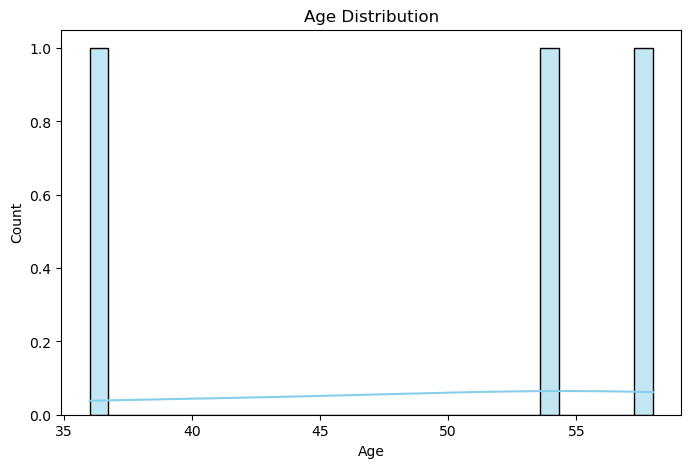

In [39]:
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['Age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

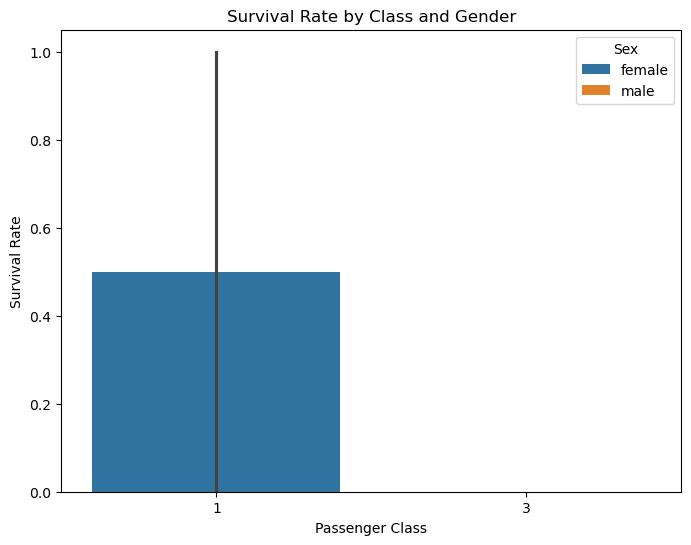

In [41]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df_clean)
plt.title("Survival Rate by Class and Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.show()

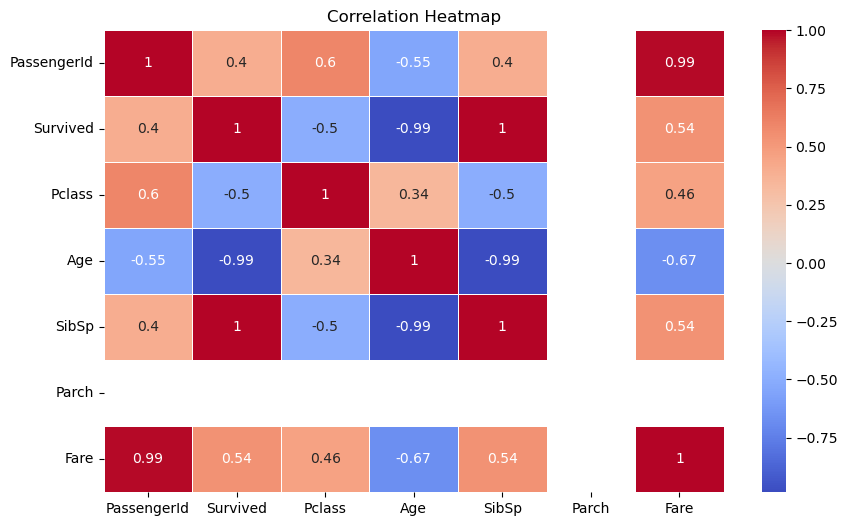

In [43]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Summary Insights
We have a  Titanic dataset, so our task is using EDA we have to,
1.Load and clean the data without null values.
After completing all the tasks We observed these insignts those are
Gender: Females had a much higher survival rate compared to males.
Class: Passengers in 1st class had the highest survival rate, followed by 2nd, then 3rd.
Age Distribution: Most passengers were between 20 to 40 years old.
Correlation: Fare had a mild positive correlation with survival and  Pclass had a negative correlation.